<a href="https://colab.research.google.com/github/olusipedaniel/zero-to-mastery-exercises/blob/main/02_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

### 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [1]:
# Importing python libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing make_moons dataset from sklearn
from sklearn.datasets import make_moons
(X,y)=make_moons(n_samples=1000,
                random_state=42)
X,y[:10]

(array([[ 0.00872719,  0.36817352],
        [ 0.921384  , -0.49690497],
        [ 0.94022577, -0.49821192],
        ...,
        [ 1.64091013, -0.26761592],
        [-0.91991616,  0.39211512],
        [ 0.80079841,  0.59893397]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
# Packing data into DataFrame
make_moons=pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "Label":y})

make_moons.head()

,X1,X2,Label
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


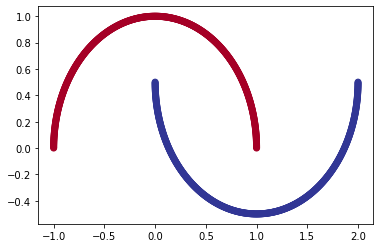

In [4]:
# Visualizing data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [5]:
# Spliting data to training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.3,
                                               random_state=42)

In [6]:
# Checking the shape of the training and test sets
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [7]:
# Building the model
# Setting random seed
tf.random.set_seed(42)

# 1. Create a model
model_1=tf.keras.Sequential([
   tf.keras.layers.Dense(10,activation="relu"),
   tf.keras.layers.Dense(10,activation="relu"),
   tf.keras.layers.Dense(1,activation="sigmoid")                         
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# 3. Fit the model
history_1=model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
22/22 [==============================] - 2s 5ms/step - loss: 0.7825 - accuracy: 0.4914
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7204 - accuracy: 0.5014
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.5200
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6244 - accuracy: 0.5557
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5872 - accuracy: 0.5971
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5522 - accuracy: 0.6871
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.8043
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4969 - accuracy: 0.8243
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.8400
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4551 - accuracy: 0.8514
Epoch 11/

In [8]:
# Evaluating model_1
model_1.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 1.0000


[0.015069921500980854, 1.0]

In [9]:
# Making predictions with model_1 
y_pred=model_1.predict(X_test)
tf.round(y_pred[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [10]:
# Checking y_test
y_test

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

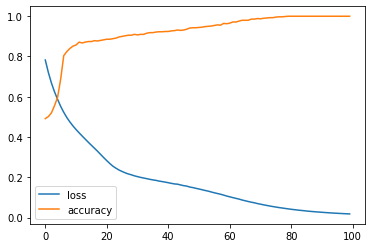

In [11]:
# Plotting loss curve again epochs
pd.DataFrame(history_1.history).plot()

In [12]:
# Creating a function to visualize how model_1 is performing...
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(y_pred).reshape(xx.shape)
    # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification...
doing binary classification...


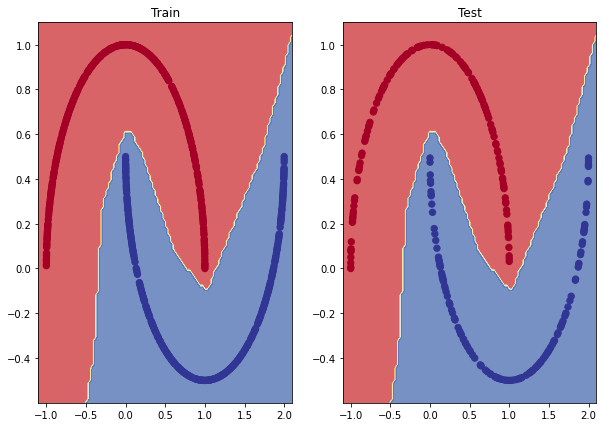

In [13]:
# Set figsize
plt.figure(figsize=(10,7))
# Defining the subplot axes and plotting model performance
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_1,
                       X=X_train,
                       y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_1,
                       X=X_test,
                       y=y_test)

In [14]:
# Evaluating model_1 performance to see where it got confused
# Importing confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,tf.round(y_pred))

array([[156,   0],
       [  0, 144]])

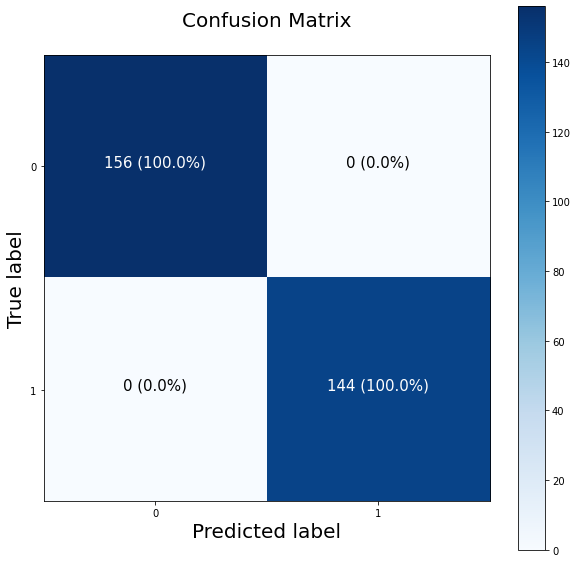

In [15]:
# Making confusion matrix prettier

import itertools
figsize = (10, 10)

cm=confusion_matrix(y_test,tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Prettifying it
fig, ax = plt.subplots(figsize=figsize)

# Creating a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Creating classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Setting axes label
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Setting x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjusting label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Setting threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plotting text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

### 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [16]:
# Loading fashion_mnist data from Tensorflow datasets
(train_data,train_labels),(test_data,test_labels)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [17]:
# Checking the shapes of training and test datasets
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [18]:
train_data[0],train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

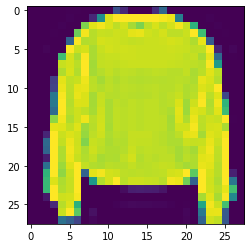

In [19]:
# Visualizing a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [20]:
# Checking out sample labels
train_labels[7]

2

In [21]:
# Creating small list so i can index onto the train labels
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Text(0.5, 1.0, 'Bag')

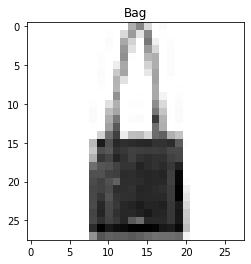

In [22]:
# Plotting an example image and its label
n=200
plt.imshow(train_data[n],cmap=plt.cm.binary);
plt.title(class_names[train_labels[n]])

In [23]:
range(len(train_data))

range(0, 60000)

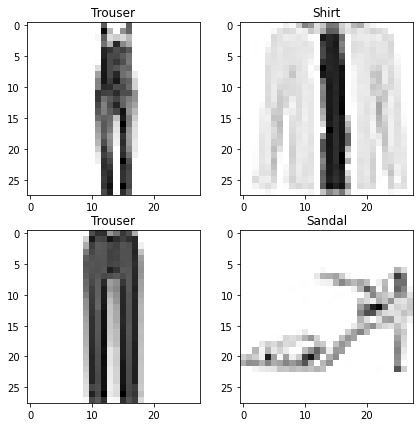

In [24]:
# Plotting random images of fashion_mnist data
import random
# Setting figsize
plt.figure(figsize=(7,7))
for i in range(4):
  # Defining subplot axes
  ax=plt.subplot(2,2,i+1)
  # Setting up random integers
  rand_choice=random.choice(range(len(train_data)))
  # Plotting random data with its label
  plt.imshow(train_data[rand_choice],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_choice]])

In [25]:
# Building a model but flattening the data and setting output shape of 10
tf.random.set_seed(42)

# 1. Create the model
model_2=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
]) 

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# 3. Fit the model
model_2.fit(train_data,
            train_labels,
            epochs=100,
            validation_data=(test_data,test_labels))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3565 - accuracy: 0.1642 - val_loss: 1.7498 - val_accuracy: 0.2383
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6234 - accuracy: 0.2990 - val_loss: 1.5334 - val_accuracy: 0.3311
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4639 - accuracy: 0.3705 - val_loss: 1.3378 - val_accuracy: 0.4237
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3299 - accuracy: 0.4306 - val_loss: 1.2807 - val_accuracy: 0.4495
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2959 - accuracy: 0.4442 - val_loss: 1.2825 - val_accuracy: 0.4420
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2787 - accuracy: 0.4467 - val_loss: 1.2738 - val_accuracy: 0.4442
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2613 - accuracy: 0.4511 - val_loss: 1.2480 - val_ac

Neural network prefers data data to scaled (or normalized), this means they like to have the number in the tensors they find patterns between 0 & 1, normalizing dataset

In [26]:
# To normalize, dividing training and test data by the maximum data to get them between 0 & 1; getting the maximum data
train_data.max(), test_data.max()

(255, 255)

In [27]:
# Dividing the training and test set by the maximum
train_data_norm=train_data/255
test_data_norm=test_data/255

In [28]:
# Building another model but fitting the model to the normalized data
# Setting random seed
tf.random.set_seed(42)

# 1. Create the model
model_3=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(10,activation="softmax")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# 3. Fit the model
history_3=model_3.fit(train_data_norm,
                      train_labels,
                      epochs=100,
                      validation_data=(test_data_norm,test_labels))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7175 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.8237
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4600 - accuracy: 0.8387 - val_loss: 0.5208 - val_accuracy: 0.8253
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4300 - accuracy: 0.8481 - val_loss: 0.4625 - val_accuracy: 0.8366
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4134 - accuracy: 0.8551 - val_loss: 0.4497 - val_accuracy: 0.8394
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4029 - accuracy: 0.8580 - val_loss: 0.4701 - val_accuracy: 0.8359
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3948 - accuracy: 0.8602 - val_loss: 0.4585 - val_accuracy: 0.8366
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3883 - accuracy: 0.8632 - val_loss: 0.4507 - val_ac

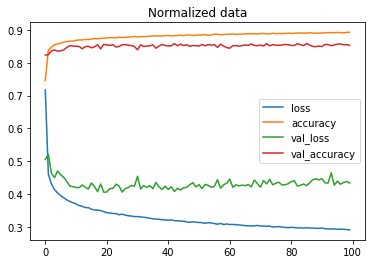

In [29]:
# Plotting loss curve against epochs
pd.DataFrame(history_3.history).plot(title="Normalized data")

In [30]:
# Making predictions with model_3
y_probs=model_3.predict(test_data_norm)
y_probs

array([[1.06397746e-09, 5.74544481e-14, 3.60777991e-10, ...,
        2.53694475e-01, 1.05833372e-07, 7.41263628e-01],
       [1.89687000e-06, 5.18865861e-16, 9.48012412e-01, ...,
        6.12720761e-23, 4.26467022e-06, 6.49116103e-28],
       [1.04316987e-05, 9.99965429e-01, 1.49546304e-06, ...,
        3.32562390e-35, 1.06083328e-12, 1.19658795e-29],
       ...,
       [8.31403956e-02, 7.61829488e-12, 1.27983349e-03, ...,
        2.91019378e-37, 9.05851781e-01, 3.71537956e-25],
       [2.25036167e-08, 9.99741375e-01, 1.51296700e-08, ...,
        5.55075269e-21, 3.66174452e-12, 1.66139838e-17],
       [9.70743930e-09, 1.09084256e-10, 2.75483302e-07, ...,
        1.13517928e-07, 3.44231488e-08, 1.22957297e-10]], dtype=float32)

In [31]:
# Finding the class with the largest predicted probability.
y_pred=tf.argmax(y_probs,axis=1)
y_pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

In [32]:
# Checking test_labels
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
# Evaluating model_3 with confusion-matrix to see where model_3 got confused while learning the patterns between the normalized data
# Importing confusion_matrix from sklearn library
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,y_pred)

array([[804,   4,  11,  42,   6,   3, 117,   0,  13,   0],
       [  1, 960,   1,  29,   2,   1,   5,   0,   1,   0],
       [ 16,   3, 705,  11, 151,   0,  99,   0,  15,   0],
       [ 28,   7,   6, 873,  34,   0,  40,   0,  12,   0],
       [  0,   1,  82,  36, 787,   0,  79,   0,  15,   0],
       [  0,   0,   0,   1,   0, 944,   0,  35,   3,  17],
       [129,   2, 101,  32,  71,   1, 636,   1,  27,   0],
       [  0,   0,   0,   0,   0,  28,   0, 956,   1,  15],
       [  4,   1,   4,   9,   4,   4,  18,   5, 947,   4],
       [  0,   0,   0,   0,   0,  17,   1,  58,   2, 922]])

In [34]:
# Making confusion_matrix prettier
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None,figsize=(10,10),text_size=15):
  # Creating the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Prettifying it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)
  
  # Setting labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Labeling the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Setting x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjusting label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Setting threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plotting the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

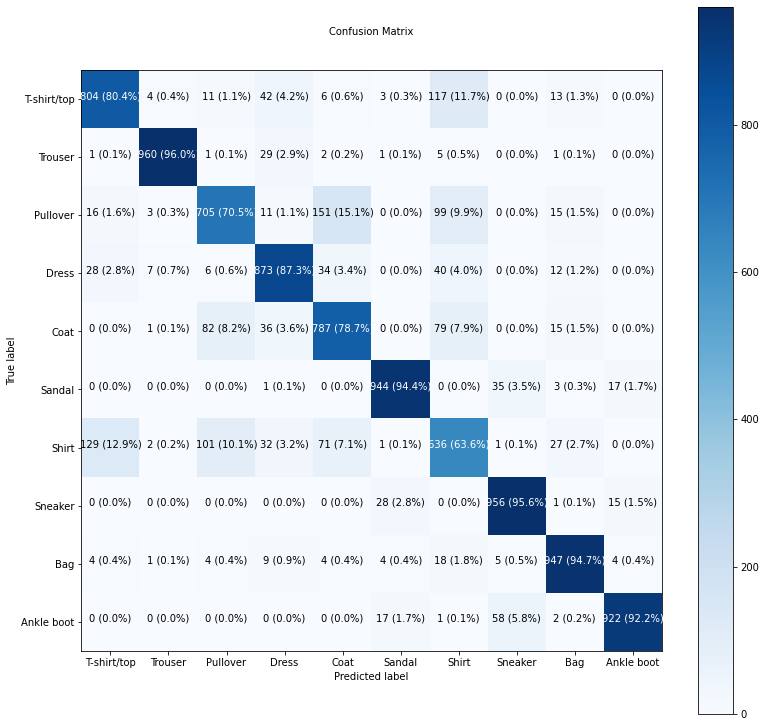

In [35]:
# Plotting confusion_matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred,
                      classes=class_names,
                      text_size=10,
                      figsize=(13,13))

In [36]:
# Creating a funtion to visualize some of model_3 prediction by plotting a random image along with it's predicion

import random

# Creating a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):

  # Setting up random integer
  i = random.randint(0, len(images))
  
  # Creating predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plotting the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Changing the color of the title depending on if model_3 prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

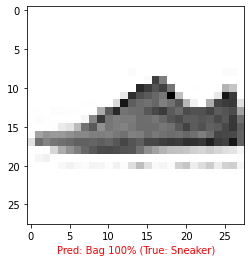

In [37]:
# Plotting random image as well as its prediction
plot_random_image(model=model_3, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

### 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [38]:
# Setting random seed
tf.random.set_seed(42)

# Creating a random tensor
x=tf.random.normal(shape=(5,5,))
x

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[ 0.3274685 , -0.8426258 ,  0.3194337 , -1.4075519 , -2.3880599 ],
       [-1.0392479 , -0.5573232 ,  0.539707  ,  1.6994323 ,  0.28893656],
       [-1.5066116 , -0.26454744, -0.59722406, -1.9171132 , -0.62044144],
       [ 0.8504023 , -0.40604794, -3.0258412 ,  0.9058464 ,  0.29855987],
       [-0.22561555, -0.7616443 , -1.891714  , -0.9384712 ,  0.77852213]],
      dtype=float32)>

In [39]:
# Applying the softmax activation tensor on it
softmax=tf.keras.activations.softmax(x)
softmax

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.3929425 , 0.12194487, 0.38979793, 0.06931372, 0.026001  ],
       [0.03743942, 0.06062146, 0.1815769 , 0.579059  , 0.1413033 ],
       [0.09965426, 0.34507814, 0.24742171, 0.06610241, 0.2417434 ],
       [0.3403341 , 0.09688043, 0.00705463, 0.35973653, 0.19599426],
       [0.20024651, 0.11715765, 0.03784318, 0.0981693 , 0.54658335]],
      dtype=float32)>

When the softmax activation is applied to the tensor, each sample in the batch now sums to 1 i.e 0.3929425+0.12194487+0.38979793+0.06931372+0.026001=1.000000001

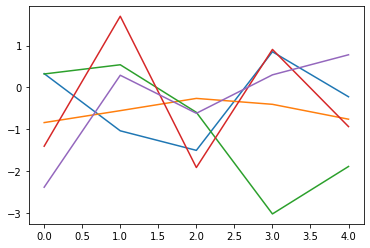

In [40]:
# Visualizing the random tensor
plt.plot(x)

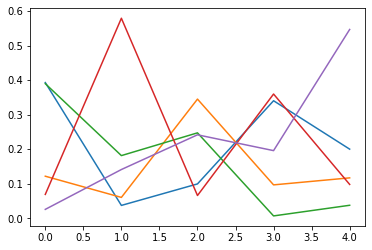

In [41]:
# Visulizating tensor after softmax function have been added to it 
plt.plot(softmax)

### 6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [42]:
# Creating a function to visualize multiple image predictions from model_3
import random
def plot_multiple_random_images(model,classes,images): 
  # Set figsize
  plt.figure(figsize=(10,10))

  for i in range(6):
    # Defining the axis
    ax=plt.subplot(3,3,i+1)

    # Setting up random integer
    rand_num=random.choice(range(len(images)))

    # Creating predictons and targets
    target_images=images[rand_num]
    predi_prob=model.predict(target_images.reshape(1,28,28))
    predi_labels=classes[predi_prob.argmax()]
    true_labels=classes[test_labels[rand_num]]

    # Plotting the target images
    plt.imshow(target_images,cmap=plt.cm.binary)

    # Changing colour of the title depending on if prediction is right or wrong
    if true_labels==predi_labels:
      color="green"
    else:
      color="red"

    # Adding xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(predi_labels,
                                                    100*tf.reduce_max(predi_prob),
                                                    true_labels),
              color=color) # set the color to green or red

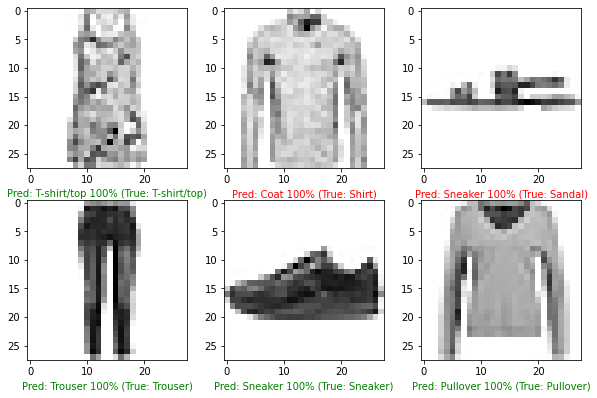

In [43]:
# Plotting random images with the predicted labels and also the true labels to evalauate model_3  
plot_multiple_random_images(model=model_3,
                            classes=class_names,
                            images=test_data)